In [1]:
import geopandas as gpd
Crosses_U_turns = gpd.read_file("Crosses_U_turns.shp")
Tasadofat_96_97_98 = gpd.read_file("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/2_Clustering/Shapefile/Clustered_Accidents.shp")

In [2]:
Crosses_U_turns.to_crs(crs= Tasadofat_96_97_98.crs, inplace=True)

In [3]:
# Drop unneeded rows
Tasadofat_96_97_98 = Tasadofat_96_97_98.drop(columns= Tasadofat_96_97_98.columns[0:113])

In [4]:
# Maintain the original indexing, re-indexing, and drop 18 rows which do not possess a segment

Tasadofat_96_97_98["OID"] = Tasadofat_96_97_98.index
Tasadofat_96_97_98.sort_values(by= "Y_", ascending= False, inplace= True, ignore_index= True)
Tasadofat_96_97_98.head()

,X_,Y_,ID,Distance,Dual_Dista,Labels_200,Labels_300,Labels_430,Labels_500,Acc_ID,geometry,OID
0,562530.3841,4.004186e+06,1.0,65.816968,0.000000,-1,-1,0,0,1.0,POINT (562530.384 4004186.076),0
1,562684.6853,4.003849e+06,2.0,40.852908,375.292765,-1,-1,0,0,2.0,POINT (562684.685 4003848.858),1
2,562715.9041,4.003634e+06,3.0,58.634003,217.787079,-1,-1,0,0,3.0,POINT (562715.904 4003634.152),2
3,562946.3556,4.002828e+06,4.0,24.762633,967.719574,-1,-1,-1,-1,NaN,POINT (562946.356 4002827.756),3
4,563062.4010,4.002767e+06,5.0,55.812578,131.195831,-1,-1,-1,-1,NaN,POINT (563062.401 4002766.730),4


In [5]:
# Creating unique id for each accident
Tasadofat_96_97_98["Unique_ID"] = Tasadofat_96_97_98["Labels_430"].loc[Tasadofat_96_97_98["Labels_430"]>-1].map(str) + "-" + (Tasadofat_96_97_98["Acc_ID"].loc[Tasadofat_96_97_98["Labels_430"]>-1].map(int).map(str))
Tasadofat_96_97_98.head()

,X_,Y_,ID,Distance,Dual_Dista,Labels_200,Labels_300,Labels_430,Labels_500,Acc_ID,geometry,OID,Unique_ID
0,562530.3841,4.004186e+06,1.0,65.816968,0.000000,-1,-1,0,0,1.0,POINT (562530.384 4004186.076),0,0-1
1,562684.6853,4.003849e+06,2.0,40.852908,375.292765,-1,-1,0,0,2.0,POINT (562684.685 4003848.858),1,0-2
2,562715.9041,4.003634e+06,3.0,58.634003,217.787079,-1,-1,0,0,3.0,POINT (562715.904 4003634.152),2,0-3
3,562946.3556,4.002828e+06,4.0,24.762633,967.719574,-1,-1,-1,-1,NaN,POINT (562946.356 4002827.756),3,NaN
4,563062.4010,4.002767e+06,5.0,55.812578,131.195831,-1,-1,-1,-1,NaN,POINT (563062.401 4002766.730),4,NaN


In [6]:
import pandas as pd
SPF_data = pd.read_excel("C:/Users/sohra/Desktop/Dr_Baradaran/Bardaskan_Sabzevar/3_SPF/spf.data.xlsx", header= 2)
SPF_data.head()

,Seg,Y,Clus.len,Seg.len,X1,X2,X3,X4,Alt1
0,1,3,582.269027,714.269027,0.714269,7327,2.800065,2,430
1,2,3,361.029199,493.029199,0.493029,7327,4.056555,2,430
2,3,4,697.282659,829.282659,0.829283,7327,1.205861,1,430
3,4,9,1401.893619,1533.893619,1.533894,7327,1.955807,3,430
4,5,5,1032.272347,1164.272347,1.164272,7327,0.000000,0,430


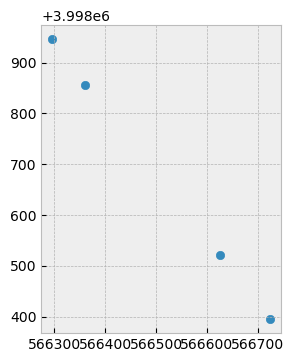

In [8]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
Tasadofat_96_97_98.loc[Tasadofat_96_97_98["Labels_430"] == 2].plot(figsize=(10,4))
plt.show()

In [99]:
# Running the Sliding Window Method on accident data within the predefined clusters

my_list = []

for seg_code in range(0,20):
    Selected_Tasadofat = Tasadofat_96_97_98[Tasadofat_96_97_98["Labels_430"] == int("{}".format(seg_code))]
    Selected_CUT = Crosses_U_turns
    distance= 430
       
    for j in range(0,len(Selected_Tasadofat)-1):
        Start_point = Selected_Tasadofat[j:j+1]
        index = Start_point.index.values[0]
        Unique_ID = Start_point["Unique_ID"].values[0]
        Buf = Start_point["geometry"].buffer(distance= distance)
        Acc_counts_list = Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])][Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].y.values <= Start_point["geometry"].y.values]
        j2 = j
                
        if (j == 0):
            #print("elif-1")
            Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].y.values <= Start_point["geometry"].y.values).sum()
            CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].y.values <= (Start_point["geometry"].y.values + 50)).sum()
            my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                    
        elif Start_point["geometry"].y.values[0] == Selected_Tasadofat[j-1:j]["geometry"].y.values[0]:
            if Start_point["geometry"].y.values[0] == Selected_Tasadofat[j+1:j+2]["geometry"].y.values[0]:
                #print("if-2")
                continue
            else:
                if (Selected_Tasadofat[j-1:j]["geometry"].y.values[0] - Start_point["geometry"].y.values[0]) > 19:
                    Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].y.values <= Start_point["geometry"].y.values).sum()
                    CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].y.values <= (Start_point["geometry"].y.values + 50)).sum()
                    my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                else:
                    continue
                    
        elif (Selected_Tasadofat[j-1:j]["geometry"].y.values[0] - Start_point["geometry"].y.values[0]) < 20:
            while (Selected_Tasadofat[j2:j2 + 1]["geometry"].y.values[0] - Start_point["geometry"].y.values[0]) < 20:
                if j2 < len(Acc_counts_list):
                    j2 += 1
                else:
                    #print("elif-2")
                    break
            Start_point2 = Selected_Tasadofat[j2:j2 + 1]        
            if j2 != j:
                Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].y.values <= Start_point2["geometry"].y.values).sum()
                CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].y.values <= (Start_point2["geometry"].y.values + 50)).sum()
                my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])
                    
        elif (Selected_Tasadofat[j-1:j]["geometry"].y.values[0] - Start_point["geometry"].y.values[0]) > 19:
            #print("elif-3")
            Acc_counts = (Selected_Tasadofat[Selected_Tasadofat.intersects(Buf[Buf.index.values[0]])]["geometry"].y.values <= Start_point["geometry"].y.values).sum()
            CUT_counts = (Selected_CUT[Selected_CUT.intersects(Buf.buffer(50)[Buf.index.values[0]])]["geometry"].y.values <= (Start_point["geometry"].y.values + 50)).sum()
            my_list.append(['{}'.format(seg_code), '{}'.format(Unique_ID), '{}'.format(distance), '{}'.format(index), '{}'.format(Acc_counts), '{}'.format(CUT_counts)])

In [103]:
Stats = pd.DataFrame(columns = ['Labels_430', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"])
Stats = Stats.append(pd.DataFrame(my_list, columns=['Labels_430', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"]))

C:\Users\sohra\AppData\Local\Temp\ipykernel_5268\3159573193.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Stats = Stats.append(pd.DataFrame(my_list, columns=['Labels_430', 'Unique_ID', 'Distance', 'Index', 'Acc_counts', "CUT_counts"]))


In [104]:
Stats.to_excel("Stats_V1.xlsx")

In [101]:
my_list

[['0', '0-1', '430', '0', '2', '1'],
 ['0', '0-2', '430', '1', '2', '1'],
 ['1', '1-1', '430', '8', '3', '1'],
 ['1', '1-2', '430', '9', '2', '2'],
 ['2', '2-1', '430', '11', '2', '0'],
 ['2', '2-2', '430', '12', '2', '1'],
 ['2', '2-3', '430', '13', '2', '1'],
 ['3', '3-1', '430', '15', '5', '0'],
 ['3', '3-2', '430', '16', '4', '0'],
 ['3', '3-3', '430', '17', '4', '0'],
 ['3', '3-5', '430', '19', '3', '0'],
 ['3', '3-6', '430', '20', '2', '1'],
 ['3', '3-7', '430', '21', '2', '1'],
 ['3', '3-8', '430', '22', '2', '2'],
 ['4', '4-1', '430', '24', '2', '0'],
 ['4', '4-2', '430', '25', '2', '0'],
 ['4', '4-3', '430', '26', '3', '0'],
 ['4', '4-4', '430', '27', '2', '0'],
 ['5', '5-1', '430', '29', '2', '1'],
 ['5', '5-2', '430', '30', '3', '1'],
 ['5', '5-3', '430', '31', '2', '2'],
 ['6', '6-1', '430', '39', '2', '3'],
 ['6', '6-2', '430', '40', '2', '3'],
 ['7', '7-1', '430', '47', '3', '2'],
 ['7', '7-2', '430', '48', '2', '2'],
 ['7', '7-3', '430', '49', '3', '0'],
 ['7', '7-5', '4

In [92]:
len(my_list)

56